In [1]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install sklearn
! pip install keras
! pip install statsmodels

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [2]:
! pip install tensorflow

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, timedelta

In [34]:
df = pd.read_csv('realdata.csv')

In [35]:
df['timestamp'] = pd.to_datetime(df['createdAt'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [36]:
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second
df['millisecond'] = df['timestamp'].dt.microsecond // 1000

In [37]:
print(df)

       nozzleTemp  bedTemp  xPos  yPos  zPos  fanSpeed  printerSpeed  \
0              98       52    65     7    92        70            32   
1              63       53    77    90    80        53            81   
2              71       77    53    58    93        26            22   
3              57       54    47     3    70        43            46   
4             132      185    82    82    49        55            43   
...           ...      ...   ...   ...   ...       ...           ...   
12923          30       30     3     0    34         0             0   
12924          30       30     3     0    34         0             0   
12925          30       30     3     0    34         0             0   
12926          29       29     3     0    34         0             0   
12927          29       29     3     0    34         0             0   

                      createdAt               timestamp  hour  minute  second  \
0      2024-04-26T08:57:39.392Z 2024-04-26 08:57:39.39

In [40]:
df_resampled_full = df.groupby(['hour', 'minute']).agg({
    'nozzleTemp': 'mean',  # Aggregate nozzleTemp column by mean
    'timestamp': 'first',  # Keep the first timestamp in each group
}).reset_index()

In [41]:
print(df_resampled_full)

     hour  minute  nozzleTemp               timestamp
0       3      59   29.000000 2024-05-14 03:59:45.073
1       4       0   29.000000 2024-05-14 04:00:00.144
2       4       1   29.000000 2024-05-14 04:01:00.954
3       4      16  104.818182 2024-04-30 04:16:20.781
4       4      17   92.297297 2024-04-30 04:17:00.991
..    ...     ...         ...                     ...
235    13      18  199.916667 2024-04-30 13:18:10.504
236    13      19  199.971429 2024-04-30 13:19:01.545
237    13      20  200.000000 2024-04-30 13:20:58.284
238    13      21  199.600000 2024-04-30 13:21:02.158
239    13      22  199.307692 2024-04-30 13:22:18.742

[240 rows x 4 columns]


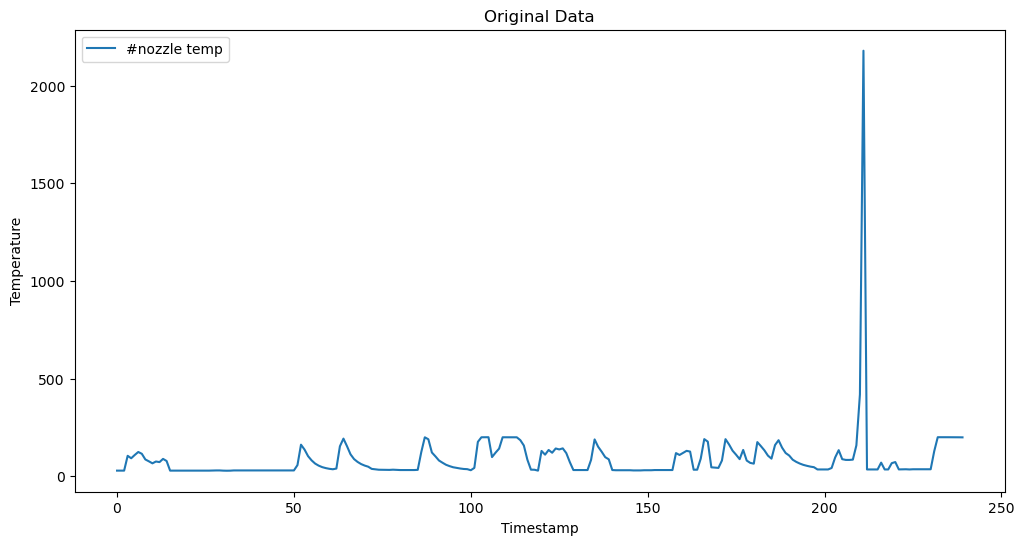

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(df_resampled_full['nozzleTemp'], label='#nozzle temp')
# plt.plot(df_resampled_full['bedTemp'], label='#bed temp')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Original Data')
plt.legend()
plt.show()

In [43]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:


# Perform seasonal decomposition
decomposition = seasonal_decompose(df_resampled_full['nozzleTemp'], model='additive')

# Extract trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(df_resampled_full['nozzleTemp'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

ValueError: This function does not handle missing values

In [18]:

decomposition = seasonal_decompose(df_resampled_full['bedTemp'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(df_resampled_full['nozzleTemp'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

KeyError: 'bedTemp'

In [46]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Exclude the datetime column
numeric_df = df_resampled_full.drop(columns=['timestamp'])

# Scale the numeric data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(numeric_df)

# If you need to keep the datetime column in the final DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=numeric_df.columns, index=df_resampled_full.index)

# For LSTM model, you typically need to reshape the data into 3D
# Assuming we are interested in scaling and reshaping only specific columns
X = df_scaled.values
X = X.reshape((X.shape[0], X.shape[1], 1))

In [47]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(2))  
model.compile(loss='mean_squared_error', optimizer='adam')

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.fit(X.reshape, X, epochs=50, batch_size=32, validation_split=0.2)

ValueError: Argument `validation_split` is only supported for tensors or NumPy arrays.Found incompatible type in the input: [<class 'builtin_function_or_method'>]

In [52]:

future_timestamps = pd.date_range(start=df_resampled_full.index[-1] + timedelta(minutes=1), periods=60, freq='1min')
future_data = pd.DataFrame(index=future_timestamps, columns=['nozzleTemp', 'bedTemp'])

future_forecasts = np.random.rand(len(future_data), 2) 

future_scaled = scaler.transform(future_forecasts)

future_reshaped = future_scaled.reshape((future_scaled.shape[0], 1, future_scaled.shape[1]))

future_predictions = model.predict(future_reshaped)
print(future_predictions)


TypeError: unsupported operand type(s) for +: 'int' and 'datetime.timedelta'

In [ ]:
future_predictions_unscaled = scaler.inverse_transform(future_predictions)


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(future_timestamps, future_predictions_unscaled[:, 0], label='Nozzle temp Forecast')
plt.plot(future_timestamps, future_predictions_unscaled[:, 1], label='Bed temp Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Forecasted Temperatures')
plt.legend()
plt.show() 